In [3]:
import pickle
from collections import Counter

# Load the imbalanced data
with open('imbalanced_data.pkl', 'rb') as f:
    imbalanced_data = pickle.load(f)

# Extract labels
labels = [label for _, label in imbalanced_data]

# Count the number of instances per class
class_counts = Counter(labels)

# Print class counts
for class_label, count in class_counts.items():
    print(f'Class {class_label} has {count} instances')

# Print total number of classes
print(f'Total number of classes: {len(class_counts)}')



Class 3 has 500 instances
Class 6 has 5000 instances
Class 9 has 5000 instances
Class 4 has 5000 instances
Class 1 has 5000 instances
Class 2 has 5000 instances
Class 7 has 5000 instances
Class 8 has 5000 instances
Class 5 has 5000 instances
Class 0 has 5000 instances
Total number of classes: 10


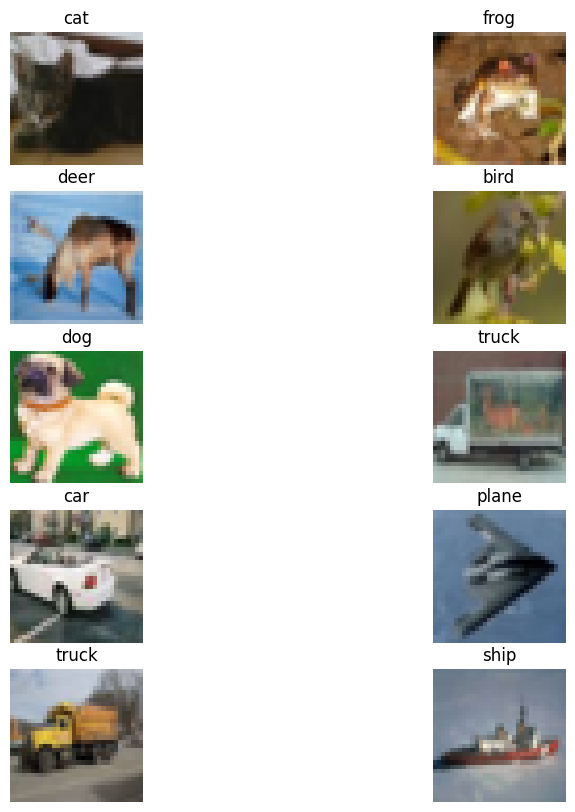

In [4]:
# Plot example images from each class

import matplotlib.pyplot as plt

# Define class names

class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Define figure size
plt.figure(figsize=(10, 10))

# Load the imbalanced data
with open('imbalanced_data.pkl', 'rb') as f:
    imbalanced_data = pickle.load(f)

# Extract images and labels
images, labels = zip(*imbalanced_data)

# plot example of each images
idx = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]
for id in idx:
    plt.subplot(5, 2, idx.index(id) + 1)
    plt.imshow(images[id])
    plt.title(class_names[labels[id]])
    plt.axis('off')
    

In [5]:
# This is an example of how to load test_data, run your model on test_data and generate an output file.

import torch
import pickle
from scratch_model import VisionTransformer
from torchvision.transforms import transforms
from torch.utils import data
# Output required
# At the end of the challenge you will have to submit your code along with the classes associated with the test_data.pkl
# Your model should infere on test_data.pkl and output a list of [10000](number of example in test_data) integers that reflect the classes of the test_data guessed by your model
# Here is a dummy example :

with open('test_data.pkl', 'rb') as f:
    test_data = pickle.load(f)

# Loading model used in this project

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

checkpoint = torch.load('./models/weight_best_model.pth')

model = VisionTransformer().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 3e-4)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss_fn = checkpoint['loss']

transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize([0.49139968, 0.48215841, 0.44653091], [0.26733429, 0.25643846, 0.27615047])
                                ])

test_set = [transform(image) for image in test_data]

loader_kwargs = ({'num_workers' : 4, 'pin_memory': True} if torch.cuda.is_available() == True else {})
test_loader = data.DataLoader(test_set, batch_size=128, shuffle=False, drop_last=False, **loader_kwargs)

In [6]:
import numpy as np

# Example of how to generate output and save it to a pkl file
prediction = []
with torch.no_grad():
    for _ in test_loader :
        image = _.to(device)
        pred = model(image)
        prediction.append(pred.cpu())

predicted_labels = []
for i in prediction:
    for j in i :
        predicted_labels.append(np.argmax(j.numpy()))

with open("output.pkl", "wb") as f:
    pickle.dump(predicted_labels, f)
    
# When done, you will need to send "output.pkl" for verification.
